# Final Project 2: Exploratory Data Analysis on University Rankings

This case study consists of 3 parts: 


A. Data understanding and exploration
- Student to decide how to explore, inspect and cleanse the data 

B. Questions: 6 in total
- Answer the questions and derive the requested outputs with necessary explanations and inferences 

C. Open-ended Question 
- Student to decide the scope and methods/packages to use to answer the question and derive insights

The data reflects four years of ranking, 2012, 2013, 2014, 2015; 2012 and 2013 consists of the top 100 universities while 2014, and 2015 are the top 1000 universities. The data could be assessed on a yearly basis to uncover trends. 

The data was collected by The Center for World University Rankings. Sampling was weighted based on the following criteria: research output, (10%), high-quality publication, (10%), influence, (10%), citations, (10%), quality of faculty, (10%), alumni employment, (25%), quality of education, (25%). The totals of the above criteria is then used te create an aggregation and scoring. 

Data dictionary:
- World_rank - World rank for the university.
- Institution - Name of the university.
- Country - Country of each university.
- National_Rank - Rank of university within its country.
- Quality_of_education - Rank for quality of education; measured by the number of a university's alumni who have garnered major international accolades, i.e. Pulitzer, Nobel Prize.
- Alumni_employment - Rank for alumni employment; measured by the number of a university's alumni who have held CEO positions at multinational companies in relation to the university's size.
- Quality_of_faculty - Rank for quality of faculty; measured by the number of faculty who have won major international awards.
- Publications - Rank for publications.
- Influence - Rank for influence.
- Citations - Rank for citations.
- Broad_impact - Rank for broad impact (only available for 2014 and 2015).
- Patents - Rank for patents.
- Score - Total score, used for determining world rank.
- Year - Years of ranking (2012 to 2015).

# A. Data Understanding and exploration

### Read the cwur.Data.csv file and inspect the data, understand the data (what are the components, how it looks like, and some basic statistics about the variables). Take necessary steps to address any problems or issues with the data and fix them with appropriate measures.

In [1]:
import numpy as np
import pandas as pd                          # import liberies

df_uni = pd.read_csv("cwurData.csv")         # Read the .csv file with pandas function
df_uni.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


## Observation:
After inspect and found the data is having problem on different sample size, where first 2 years is Top 100, and another 2 years is Top 1000. This could affect accuracy of the analysis, because ranking of university will change every year.<br>

In order to overcome this, the data will be evaluated by sorting into two data frames, the Top 100 (df_T100) for year 2012 and 2013, and Top 1000 (df_T1000) for year 2014 and 2015.


### Data for sample size with Top 100.
Year 2012 and 2013, apply ".shape" to check (200,14).

In [2]:
df_T100 = df_uni.loc[:199]            
df_T100.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


### Data for sample size with Top 1000.
Year 2014 and 2015, apply ".shape" to check (2000,14).

In [3]:
df_T1000 = df_uni.loc[200:2199]        
df_T1000.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014


### Statistics check - df_T100 
- Evaluate the "country" with "max / highest" university in the top 100. Result showing the country with maximum is USA with total 115 University and follow by UK and Japan. <br>

- Compute the "max / highest" data into percentage for the top 3.<br>

- And apply basic statistic check for all others variables of Top 100.

In [4]:
max_T100 = df_T100.country.value_counts(ascending=False).head(10)   
max_T100


USA               115
United Kingdom     15
Japan              11
France             10
Switzerland         8
Israel              8
Canada              7
Germany             5
Australia           4
Netherlands         3
Name: country, dtype: int64

In [5]:
dif_max100 = max_T100.nlargest(3) / max_T100.sum() * 100
dif_max100


USA               61.827957
United Kingdom     8.064516
Japan              5.913978
Name: country, dtype: float64

In [6]:
df_T100.describe()


,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,0.0,200.000000,200.000000,200.000000
mean,50.500000,17.880000,66.090000,75.650000,56.495000,54.845000,55.585000,54.1750,NaN,63.600000,55.106050,2012.500000
std,28.938507,18.335938,35.716808,34.281095,34.473644,33.451998,33.892274,32.9907,NaN,36.691982,13.046634,0.501255
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,NaN,1.000000,43.360000,2012.000000
25%,25.750000,2.000000,32.000000,49.500000,25.750000,25.750000,25.750000,25.7500,NaN,27.750000,46.507500,2012.000000
50%,50.500000,8.000000,78.000000,101.000000,52.000000,52.000000,52.000000,51.5000,NaN,67.000000,49.925000,2012.500000
75%,75.250000,33.000000,101.000000,101.000000,94.000000,88.250000,92.250000,86.5000,NaN,101.000000,58.340000,2013.000000
max,100.000000,58.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0000,NaN,101.000000,100.000000,2013.000000


### Statistics check - df_T1000
- Evaluate the "country" with "max / highest" university in the top 1000. Result showing USA still the country with maximum and with total 458 University and follow by China and Japan.<br>

- Compute the "max / highest" data into percentage for the top 3. <br>

- And apply basic statistic check for all others variables of Top 1000.

In [7]:
max_T1000 = df_T1000.country.value_counts(ascending=False).head(10)     
max_T1000


USA               458
China             167
Japan             148
United Kingdom    129
Germany           110
France             99
Italy              94
Spain              81
South Korea        70
Canada             65
Name: country, dtype: int64

In [8]:
dif_max1000 = max_T1000.nlargest(3) / max_T1000.sum() * 100
dif_max1000


USA      32.230823
China    11.752287
Japan    10.415201
Name: country, dtype: float64

In [9]:
df_T1000.describe()


,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,500.500000,42.518000,296.001500,385.263500,191.127500,500.415000,500.21900,449.341500,496.699500,470.321000,47.067630,2014.500000
std,288.747186,53.444193,106.868798,171.874782,52.402579,288.674823,288.30505,250.141228,286.919755,259.625408,6.590461,0.500125
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,44.020000,2014.000000
25%,250.750000,7.000000,250.750000,250.750000,210.000000,250.750000,250.75000,234.000000,250.500000,242.750000,44.440000,2014.000000
50%,500.500000,22.000000,355.000000,478.000000,210.000000,500.500000,500.50000,428.000000,496.000000,481.000000,44.960000,2014.500000
75%,750.250000,52.000000,367.000000,500.250000,218.000000,750.000000,750.25000,645.000000,741.000000,737.000000,46.812500,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.00000,812.000000,1000.000000,871.000000,100.000000,2015.000000


## Note:
**Alternative solution**, data can be sort and focus on Top 100 for 4 years, as the data is equal and sufficient to show the trend of the ranking. These will be evaluated in Question B.


# B. Questions
### Answer the questions below based on the dataset. 

### 1. Focusing only on rows with world_rank smaller and inclusive of 100: Which country (throughout all years) has the most number universities within top 100 of world_rank? Let's call count of universities within top100 as 'count_100'. What are the top 10 countries by value of count_100, and what is count_100 for each of these countries?

In [11]:
df_uni.head()         # Call out the file for checking.


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


### Focus on the world ranking with Top 100 for 4 years, 2012 to 2015.
- Compute Top 100 data, zero index end at 101.
- count_100.to_csv('count_100 check.csv'). Save file for checking.<br>


- Perform checking on country with most number of University in Top 100 across the 4 years and Top 10 of 'count_100'.<br>
**Answer:** Country with most University in 'count_100' is:  USA    223

In [12]:
count_100 = df_uni[(df_uni.world_rank < 101)]    
count_100.head()                                 
    

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [13]:
most_uni = count_100.country.value_counts(ascending=False)

print("Country with most University in 'count_100' is: ", most_uni.nlargest(1))    
print("\nThe Top 10 country of 'count 100' is:\n", most_uni.nlargest(10))


Country with most University in 'count_100' is:  USA    223
Name: country, dtype: int64

The Top 10 country of 'count 100' is:
 USA               223
United Kingdom     29
Japan              26
France             18
Switzerland        16
Israel             14
Canada             13
Germany            11
Australia           8
Netherlands         6
Name: country, dtype: int64


### 2. For the top 10 countries with largest amount of top100 universities, What is the percentage composition of each countries' count_100 out of the 10 countries? (ie. the 10 countries make up 100%) 

In [14]:
count_100 = df_uni[(df_uni.world_rank < 101)]          # Call out the Top 100 file.
count_100.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


### Count the top 10 country and their total of University.

In [15]:
top_10 = count_100.country.value_counts(ascending=False).nlargest(10)   
top_10    


USA               223
United Kingdom     29
Japan              26
France             18
Switzerland        16
Israel             14
Canada             13
Germany            11
Australia           8
Netherlands         6
Name: country, dtype: int64

### Compute the percentage composition for top 10 only.

In [16]:
percent_Comp = top_10 / top_10.sum() *100                # top_10.sum() = 364
print("Percentage Composition (for Top 10) of each countries in 'count_100' is:\n", percent_Comp) 


Percentage Composition (for Top 10) of each countries in 'count_100' is:
 USA               61.263736
United Kingdom     7.967033
Japan              7.142857
France             4.945055
Switzerland        4.395604
Israel             3.846154
Canada             3.571429
Germany            3.021978
Australia          2.197802
Netherlands        1.648352
Name: country, dtype: float64


### 3. Plot a graph showing the top 5 countries from Q2 and their counts

### First compute the Top 5 country of Q2 with include the percentage.

In [17]:
ques_3 = top_10.nlargest(5) # + percent_Comp
ques_3

USA               223
United Kingdom     29
Japan              26
France             18
Switzerland        16
Name: country, dtype: int64

### Plot the graph showing the top 5 country

(0.0, 250.0)

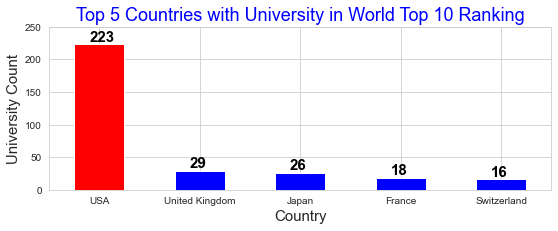

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sns.set()             # use Seaborn styles
sns.set_style('whitegrid')
plt.figure(figsize=(9,3))

# creating 'bar-chart'.
color=['red','blue','blue','blue','blue']
ax1 = ques_3.plot(x="Percentage", y="Country", kind="bar", color=color, rot=0)   
plt.title("Top 5 Countries with University in World Top 10 Ranking", fontdict = {"fontsize":18},
          color='blue')

# label the Title.          
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5),
                     color='black', fontweight='bold', fontsize=15)

plt.xlabel('Country',fontdict = {"fontsize":15})             # label the x-y.
plt.ylabel('University Count',fontdict = {"fontsize":15})     
plt.ylim(0, 250)
#plt.legend(["Count"])         # display the legend.


### 4. Groupby year and country showing the count of universities with world_rank within top 100 for that country and year. Set the name for column of counts as 'count_top100'. Sort the year in ascending order while count_top100 in descending order. See the table below as example output.

In [19]:
count_100 = df_uni[(df_uni.world_rank < 101)]      # Call out the top 100.
count_100.head()   


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


### Perform groupby function
Groupby for 'year', 'country' and count of 'institution' for Universities within top 100 by country.
- Set the column name to **'count_top100'**, since only one column, can apply ".columns" function to set.

In [20]:
count_inst = count_100.groupby(['year','country'])[(["institution"])].count()   
count_inst.columns = ['count_top100']           
                                  
count_inst  


count_top100
year country                     
2012 Australia                  2
     Canada                     3
     Denmark                    1
     Finland                    1
     France                     5
...                           ...
2015 Sweden                     1
     Switzerland                4
     Taiwan                     1
     USA                       55
     United Kingdom             7

[72 rows x 1 columns]

### Perform Sort by 'year' and 'count_top100'

In [21]:
count_inst.sort_values(['year','count_top100'], ascending = [True, False]).head()    


count_top100
year country                     
2012 USA                       58
     United Kingdom             8
     France                     5
     Japan                      5
     Israel                     4

### 5. Use an appropriate visual chart to display the trend for the count of top 100 universities for Japan, China and Singapore for years 2012 - 2015 in a single chart.

In [22]:
cnt_T100=count_inst.sort_values(['year','count_top100'], ascending=[True, False]) # Call df above 
cnt_T100.head()     


count_top100
year country                     
2012 USA                       58
     United Kingdom             8
     France                     5
     Japan                      5
     Israel                     4

### Display Japan, China and Singapore
In order to sort out the 3 countries, first add-in the 'index' for filtering. Because the Data for the 3 country is not the same, hence have to select by each country individually.

1) Japan = slt_J <br>
2) China = slt_C <br>
3) Singapore = slt_S <br>

In [23]:
filter_JCS = cnt_T100.reset_index()
filter_JCS


,year,country,count_top100
0,2012,USA,58
1,2012,United Kingdom,8
2,2012,France,5
3,2012,Japan,5
4,2012,Israel,4
...,...,...,...
67,2015,Norway,1
68,2015,Russia,1
69,2015,Singapore,1
70,2015,Sweden,1


In [24]:
slt_J = filter_JCS.loc[(filter_JCS.country == 'Japan')]          # Japan in 4 years
slt_C = filter_JCS.loc[(filter_JCS.country == 'China')]          # China in 2 years
slt_S = filter_JCS.loc[(filter_JCS.country == 'Singapore')]      # Singapore in 3 years.


In [25]:
slt_J

,year,country,count_top100
3,2012,Japan,5
18,2013,Japan,6
35,2014,Japan,8
54,2015,Japan,7


In [26]:
slt_C

,year,country,count_top100
43,2014,China,2
61,2015,China,2


In [27]:
slt_S

,year,country,count_top100
31,2013,Singapore,1
50,2014,Singapore,1
69,2015,Singapore,1


### Create a new DataFrame - df_JCS
Combine the 3 country's data and create a new DataFrame "df_JCS" to plot chart and display the trend.

In [28]:
df_JCS = pd.concat([slt_J] + [slt_C] + [slt_S])
df_JCS.reset_index(drop=True, inplace=True)    # reset the index
df_JCS


,year,country,count_top100
0,2012,Japan,5
1,2013,Japan,6
2,2014,Japan,8
3,2015,Japan,7
4,2014,China,2
5,2015,China,2
6,2013,Singapore,1
7,2014,Singapore,1
8,2015,Singapore,1


### Visualize the Trend (with count) for 3 countries - Bar Chart
With the count of top 100 universities, plotting a bar chart for country of Japan, China and Singapore (in 4 years).

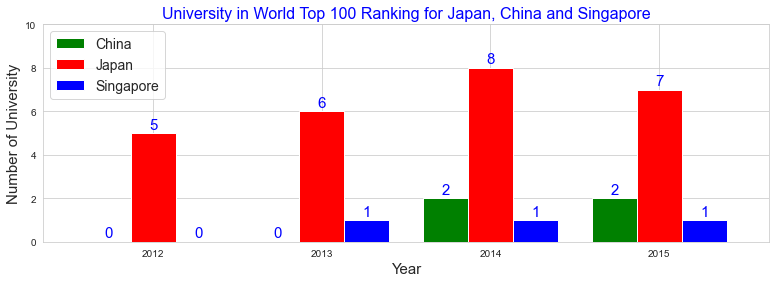

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
ax2 = pd.pivot_table(df_JCS, index ='year', columns ='country', 
                     values ='count_top100').plot.bar(figsize=(13,4), color="grb", width=0.8, rot=0)

for p in ax2.patches:
        ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.11, p.get_height()+0.2), 
                     color='blue', fontsize=15)  
        
plt.title("University in World Top 100 Ranking for Japan, China and Singapore", 
          fontdict = {"fontsize":16}, color='blue')
plt.xlabel('Year',fontdict = {"fontsize":15})                    # label the x-y.
plt.ylabel('Number of University',fontdict = {"fontsize":15})  
plt.ylim(0, 10)
plt.legend(fontsize=14, loc='upper left');


### 6. For top 10 universities in 2015, what was the trend for world_rank for those universities across all the years? Which universities generally improved, and which ones declined in world_rank? Use an appropriate visual to show the trend and explain the results.

In [30]:
# Sort out the top 10 for 4 years to compare the trend. 

count_10 = df_uni[(df_uni.world_rank < 11)] 
count_10.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


### Top 10 university based on 'year', 'institution' and 'world rank' 
Checking the performance of each university and indicate which is improvied, and which is declined. Sort the data across the 4 years and assign new dataframe "sort_ten". Compare the performance with chart.

In [31]:
sort_ten = count_10.sort_values(['year','institution','world_rank'], ascending = [True, True, True])
sort_ten.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012


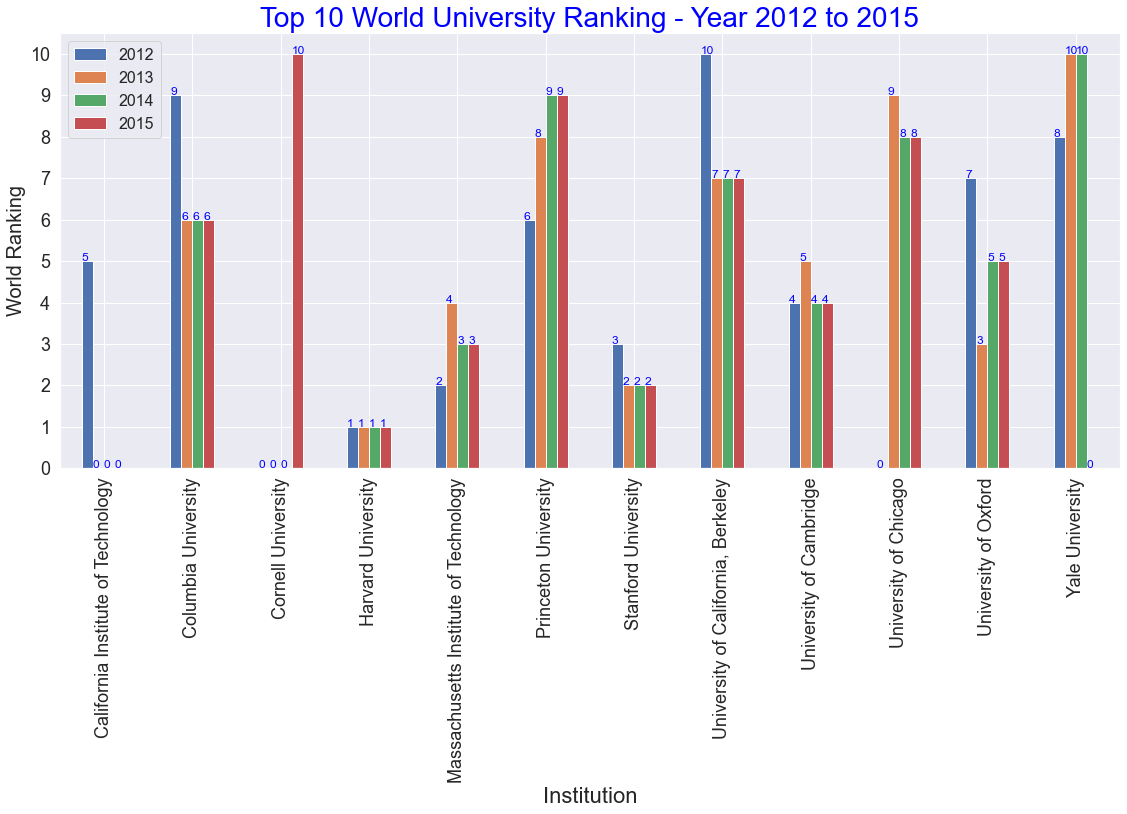

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  

ax3 = pd.pivot_table(sort_ten, index ='institution', columns ='year', 
                     values ='world_rank').plot.bar(fontsize=18,figsize=(19,8))
for p in ax3.patches:
        ax3.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()), 
                     color='blue', fontsize=12)  

plt.title("Top 10 World University Ranking - Year 2012 to 2015", color='blue', 
          fontdict= {"fontname": "Arial", "fontsize": 28}) 

plt.ylabel('World Ranking', fontdict= {"fontsize": 20})
plt.xlabel("Institution", fontdict= {"fontsize": 22})
#plt.ylim(0, 10)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.legend(fontsize=16);


## Explanation on Result:
#### Total 8 university stay in the top 10 across the 4 years, and
## Trends of Top 10 University which is increased and declined over the 4 years.

### University increased in ranking over the 4 years:
1) Stanford University (USA), from 3rd to 2nd and remained till 2015.<br>
2) Columbia University (USA), from 9th to 6th and remained till 2015.<br>
3) University of California, Berkeley (USA), from 10th to 7th and remained till 2015.<br>
4) University of Chicago (USA), not Top 10 in 2012, increased from 9th and remained 8th till 2015.<br>
5) Cornell University (USA), was not in the Top 10 over the past 3 years, and was 10th in 2015.<br>

### University declined in ranking over the 4 years:
1) California Institute of Technology (USA), was 5th in 2012 but out of Top 10 from 2013 to 2015.<br>
2) Massachusetts Institute of Technology (USA), was 2nd in 2012 but declined and remained in 3rd in 2015.<br>
3) Princeton University (USA), was 6th in 2012 but declined to 9th in 2015.<br>
4) Yale University (USA), was 8th and declined to 9th and out of the Top 10 in 2015.<br>

#### In 2015, Harvard University (USA) was 1st place in the Top 10 ranking and remained as 1st across the 4 years.



# C. OPEN ENDED QUESTION (Choose 1 among the following)
### Option 1: What are some of the factors (variables) that may be related to the world_rank and/or score? Is there any trends indicating shift in importance of factors influencing world_rank over the years or between countries? 

### Option 2: What are the relationships between the factors (variables) themselves? Is there any interesting patterns that can be detected? You may also choose to discuss yearly or country trends or a mixture of both. 

### For either of the above, you may choose to pick around 3-4 factors to deep-dive (how many factors to analyse is up to you). Additionally, if there's any other interesting insights about the data, you may also include in your analysis. 

## Question C: Option 2 (selected)
Reference to analysis on Question B, result that focusing on Top 100 is more accurate. As all 4 years is having equal data and sufficient to show the trend of the ranking.


In [33]:
# Call out the top 100 file to select the factors to evaluate.

count_100 = df_uni[(df_uni.world_rank < 101)]    
count_100.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [34]:
count_100.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.260143,0.400107,0.246665,0.543446,0.314943,0.460008,0.291380,0.306743,0.273335,-0.815070,0.000000
national_rank,0.260143,1.000000,0.152168,0.044759,0.134547,0.084958,-0.018232,-0.157621,-0.128116,-0.084730,-0.329139,-0.044303
quality_of_education,0.400107,0.152168,1.000000,0.105684,0.594848,0.203510,0.425207,0.215795,0.284653,0.018856,-0.354196,0.223132
alumni_employment,0.246665,0.044759,0.105684,1.000000,-0.075231,0.219862,-0.028856,0.180409,-0.019134,0.332313,-0.226238,0.257284
quality_of_faculty,0.543446,0.134547,0.594848,-0.075231,1.000000,0.317427,0.621163,0.365843,0.469852,0.101072,-0.465980,0.192904
publications,0.314943,0.084958,0.203510,0.219862,0.317427,1.000000,0.743741,0.756416,0.817711,0.442145,-0.306530,0.162709
influence,0.460008,-0.018232,0.425207,-0.028856,0.621163,0.743741,1.000000,0.728108,0.913779,0.373454,-0.404744,0.159643
citations,0.291380,-0.157621,0.215795,0.180409,0.365843,0.756416,0.728108,1.000000,0.845118,0.473830,-0.279307,0.167215
broad_impact,0.306743,-0.128116,0.284653,-0.019134,0.469852,0.817711,0.913779,0.845118,1.000000,0.456053,-0.368105,-0.025420
patents,0.273335,-0.084730,0.018856,0.332313,0.101072,0.442145,0.373454,0.473830,0.456053,1.000000,-0.206503,0.226696


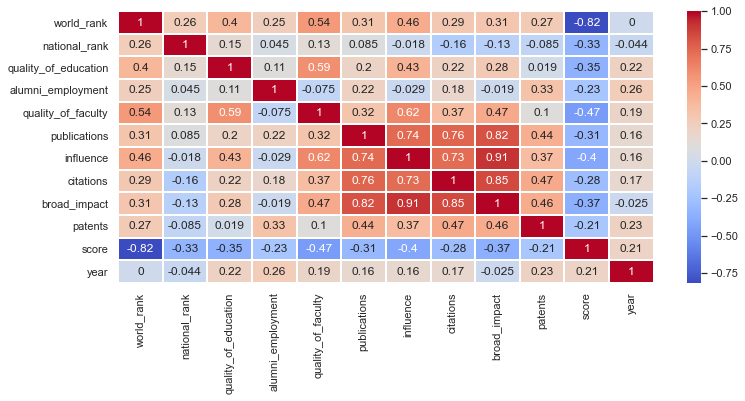

In [35]:
plt.figure(figsize=(12,5))
sns.heatmap(count_100.corr(), linewidths=1, annot=True, cmap= 'coolwarm')  

### Explanation:
- Based on research of this report, factors to be selected are those with high sampling weighted, the "alumni_employment" (25%), "quality_of_education" (25%), "quality_of_faculty" (10%) and "score" that created based on all the criteria. 
- The “alumni employment” is measured by the number of a university's alumni who have held CEO positions at multinational companies, “quality of education” is measured by the number of garnered major international accolades and “quality of faculty” is measured by the number of faculty who have won major international awards.

- These are the factors that highly impact to the success of the graduate and also the university ranking.

In [36]:
factor_chk = count_100.groupby(['year','world_rank','institution',"country"])[(["alumni_employment","quality_of_education",
                                                                         "quality_of_faculty","score"])].sum()

factor_chk         # groupby the data with the 4 factors.


alumni_employment  \
year world_rank institution                           country                             
2012 1          Harvard University                    USA                             9   
     2          Massachusetts Institute of Technology USA                            17   
     3          Stanford University                   USA                            11   
     4          University of Cambridge               United Kingdom                 24   
     5          California Institute of Technology    USA                            29   
...                                                                                 ...   
2015 96         University of Zurich                  Switzerland                   389   
     97         Arizona State University              USA                           455   
     98         Yonsei University                     South Korea                    45   
     99         University of Oslo                    Norway                        286   
     100        Kyushu University                     Japan                          49   

                                                                      quality_of_education  \
year world_rank institution                           country                                
2012 1          Harvard University                    USA                                7   
     2          Massachusetts Institute of Technology USA                                9   
     3          Stanford University                   USA                               17   
     4          University of Cambridge               United Kingdom                    10   
     5          California Institute of Technology    USA                                2   
...                                                                                    ...   
2015 96         University of Zurich                  Switzerland                      115   
     97         Arizona State University              USA                              367   
     98         Yonsei University                     South Korea                      367   
     99         University of Oslo                    Norway                            53   
     100        Kyushu University                     Japan                            367   

                                                                      quality_of_faculty  \
year world_rank institution                           country                              
2012 1          Harvard University                    USA                              1   
     2          Massachusetts Institute of Technology USA                              3   
     3          Stanford University                   USA                              5   
     4          University of Cambridge               United Kingdom                   4   
     5          California Institute of Technology    USA                              7   
...                                                                                  ...   
2015 96         University of Zurich                  Switzerland                     85   
     97         Arizona State University              USA                             66   
     98         Yonsei University                     South Korea                    218   
     99         University of Oslo                    Norway                          40   
     100        Kyushu University                     Japan                          218   

                                                                       score  
year world_rank institution                           country                 
2012 1          Harvard University                    USA             100.00  
     2          Massachusetts Institute of Technology USA              91.67  
     3          Stanford University                   USA              89.50  
     4          University of Cambridge               United Kingdom   

In [37]:
factor_chk.sort_values('alumni_employment', ascending = False)


alumni_employment  \
year world_rank institution                         country                      
2015 89         University of California, Irvine    USA                    567   
     21         University of California, San Diego USA                    567   
     71         Karolinska Institute                Sweden                 567   
     39         Weizmann Institute of Science       Israel                 567   
     29         Rockefeller University              USA                    567   
...                                                                        ...   
     2          Stanford University                 USA                      2   
2013 2          Stanford University                 USA                      2   
2015 1          Harvard University                  USA                      1   
2013 1          Harvard University                  USA                      1   
2014 1          Harvard University                  USA                      1   

                                                             quality_of_education  \
year world_rank institution                         country                         
2015 89         University of California, Irvine    USA                       227   
     21         University of California, San Diego USA                        36   
     71         Karolinska Institute                Sweden                    149   
     39         Weizmann Institute of Science       Israel                     19   
     29         Rockefeller University              USA                        49   
...                                                                           ...   
     2          Stanford University                 USA                         9   
2013 2          Stanford University                 USA                        11   
2015 1          Harvard University                  USA                         1   
2013 1          Harvard University                  USA                         1   
2014 1          Harvard University                  USA                         1   

                                                             quality_of_faculty  \
year world_rank institution                         country                       
2015 89         University of California, Irvine    USA                      44   
     21         University of California, San Diego USA                      19   
     71         Karolinska Institute                Sweden                   36   
     39         Weizmann Institute of Science       Israel                   22   
     29         Rockefeller University              USA                      12   
...                                                                         ...   
     2          Stanford University                 USA                       4   
2013 2          Stanford University                 USA                       4   
2015 1          Harvard University                  USA                       1   
2013 1          Harvard University                  USA                       1   
2014 1          Harvard University                  USA                       1   

                                                              score  
year world_rank institution                         country          
2015 89         University of California, Irvine    USA       51.51  
     21         University of California, San Diego USA       66.59  
     71         Karolinska Institute                Sweden    52.79  
     39         Weizmann Institute of Science       Israel    57.17  
     29         Rockefeller University              USA       61.28  
...                                                             ...  
     2          Stanford University                 USA       98.66  
2013 2          Stanford University                 USA       93.94  
2015 1          Harvard University                  USA      100.00  
2013 1          Harvard University    

In [38]:
factor_chk.sort_values('quality_of_education', ascending = False)


alumni_employment  \
year world_rank institution                                   country                          
2015 100        Kyushu University                             Japan                       49   
     26         University of California, San Francisco       USA                        567   
     90         University of Texas MD Anderson Cancer Center USA                        567   
     85         Erasmus University Rotterdam                  Netherlands                 46   
     84         Emory University                              USA                        146   
...                                                                                      ...   
2012 5          California Institute of Technology            USA                         29   
2015 1          Harvard University                            USA                          1   
2013 1          Harvard University                            USA                          1   
2012 21         Rockefeller University                        USA                        101   
2014 1          Harvard University                            USA                          1   

                                                                           quality_of_education  \
year world_rank institution                                   country                             
2015 100        Kyushu University                             Japan                         367   
     26         University of California, San Francisco       USA                           367   
     90         University of Texas MD Anderson Cancer Center USA                           367   
     85         Erasmus University Rotterdam                  Netherlands                   367   
     84         Emory University                              USA                           367   
...                                                                                         ...   
2012 5          California Institute of Technology            USA                             2   
2015 1          Harvard University                            USA                             1   
2013 1          Harvard University                            USA                             1   
2012 21         Rockefeller University                        USA                             1   
2014 1          Harvard University                            USA                             1   

                                                                           quality_of_faculty  \
year world_rank institution                                   country                           
2015 100        Kyushu University                             Japan                       218   
     26         University of California, San Francisco       USA                          20   
     90         University of Texas MD Anderson Cancer Center USA                          80   
     85         Erasmus University Rotterdam                  Netherlands                 189   
     84         Emory University                              USA                         116   
...                                                                                       ...   
2012 5          California Institute of Technology            USA                           7   
2015 1          Harvard University                            USA                           1   
2013 1          Harvard University                            USA                           1   
2012 21         Rockefeller University                        USA                          16   
2014 1          Harvard University                            USA                           1   

                                                                            score  
year world_rank institution                                   country              
2015 100        Kyushu University                             Japan         50.60  
     26         Universi

In [39]:
factor_chk.sort_values('quality_of_faculty', ascending = False)


alumni_employment  \
year world_rank institution                           country                          
2015 100        Kyushu University                     Japan                       49   
     80         Georgia Institute of Technology       USA                         60   
     98         Yonsei University                     South Korea                 45   
     24         Seoul National University             South Korea                  9   
     34         Keio University                       Japan                        5   
...                                                                              ...   
     3          Massachusetts Institute of Technology USA                         11   
2012 1          Harvard University                    USA                          9   
2015 1          Harvard University                    USA                          1   
2013 1          Harvard University                    USA                          1   
2014 1          Harvard University                    USA                          1   

                                                                   quality_of_education  \
year world_rank institution                           country                             
2015 100        Kyushu University                     Japan                         367   
     80         Georgia Institute of Technology       USA                           135   
     98         Yonsei University                     South Korea                   367   
     24         Seoul National University             South Korea                   367   
     34         Keio University                       Japan                         284   
...                                                                                 ...   
     3          Massachusetts Institute of Technology USA                             3   
2012 1          Harvard University                    USA                             7   
2015 1          Harvard University                    USA                             1   
2013 1          Harvard University                    USA                             1   
2014 1          Harvard University                    USA                             1   

                                                                   quality_of_faculty  \
year world_rank institution                           country                           
2015 100        Kyushu University                     Japan                       218   
     80         Georgia Institute of Technology       USA                         218   
     98         Yonsei University                     South Korea                 218   
     24         Seoul National University             South Korea                 218   
     34         Keio University                       Japan                       218   
...                                                                               ...   
     3          Massachusetts Institute of Technology USA                           2   
2012 1          Harvard University                    USA                           1   
2015 1          Harvard University                    USA                           1   
2013 1          Harvard University                    USA                           1   
2014 1          Harvard University                    USA                           1   

                                                                    score  
year world_rank institution                           country              
2015 100        Kyushu University                     Japan         50.60  
     80         Georgia Institute of Technology       USA           52.08  
     98         Yonsei University                     South Korea   51.02  
     24         Seoul National University             South Korea   64.82  
     34         Keio University                       Japan         59.84  
...                                             

## Observation:

- University with highest in the factor "alumni_employment", "quality_of_education" and "quality_of_faculty" does not have the highest in score and world ranking. The score of these university is around 50. 

- However, if checking based on the individual country, USA still the highest in total results.


In [40]:
factor_chk.groupby("country",)["alumni_employment"].sum().sort_values(ascending=False).head(10)


country
USA               21447
France             3309
United Kingdom     3017
Israel             2481
Switzerland        2169
Germany            2031
Canada             1376
Japan              1373
Sweden             1273
Australia           974
Name: alumni_employment, dtype: int64

In [41]:
factor_chk.groupby("country",)["quality_of_education"].sum().sort_values(ascending=False).head(10)


country
USA               17728
Japan              3011
Switzerland        1607
United Kingdom     1448
South Korea        1291
China              1140
Canada             1005
Australia           913
Netherlands         842
Singapore           823
Name: quality_of_education, dtype: int64

In [42]:
factor_chk.groupby("country",)["quality_of_faculty"].sum().sort_values(ascending=False).head(10)


country
USA               12948
Japan              2691
France             1490
United Kingdom     1317
Australia          1102
Germany             925
Switzerland         875
Canada              857
China               856
South Korea         848
Name: quality_of_faculty, dtype: int64

### Corelation Check on the selected Factors

In [43]:
factor_chk.corr()

,alumni_employment,quality_of_education,quality_of_faculty,score
alumni_employment,1.000000,0.105684,-0.075231,-0.226238
quality_of_education,0.105684,1.000000,0.594848,-0.354196
quality_of_faculty,-0.075231,0.594848,1.000000,-0.465980
score,-0.226238,-0.354196,-0.465980,1.000000


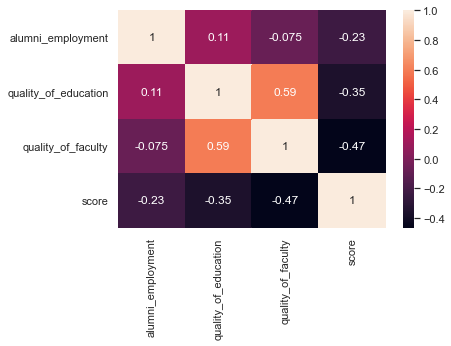

In [46]:
sns.heatmap(factor_chk.corr(), annot=True)  